# TWEET STANCE CLASSIFIER
### (Model Evaluator)

In [1]:
from utils.evaluator import StanceClassifierEvaluator
from models.custom_stance_classifier import CustomStanceClassifier
from models.transfomer_stance_classifier import StanceClassifier
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import torch

/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebre

## Load Test Data

In [10]:
test_dir = 'data/StanceDataset/test.csv'

In [11]:
from charset_normalizer import detect
# Detect the encoding
with open(test_dir, "rb") as f:
    detected_encoding = detect(f.read())["encoding"]

In [12]:
test_df = pd.read_csv(test_dir, encoding=detected_encoding, engine='python', on_bad_lines='skip')
ind_test_df = pd.read_csv("data/kawintiranon-stance-detection/biden_stance_test_public.csv")
processed_test_df = pd.read_csv('data/processed_test.csv')
processed_ind_test_df = pd.read_csv("data/processed_ind_test.csv")

In [22]:
pd.set_option('display.max_colwidth', 200)

In [119]:
ind_test_df = ind_test_df.rename(columns={"text": "Tweet", "label": "Stance"}).assign(Target="Joe Biden")

In [120]:
test_df = pd.concat([ind_test_df, test_df])

In [121]:
processed_test_df = pd.concat([processed_ind_test_df, processed_test_df])

In [122]:
stance_map = {'FAVOR': 0, 'AGAINST': 1, 'NONE': 2}
test_df['Stance_Numeric'] = test_df['Stance'].map(stance_map)
processed_test_df['Stance_Numeric'] = processed_test_df['Stance'].map(stance_map)

In [123]:
y_test = test_df['Stance_Numeric']

In [124]:
y_target = test_df["Target"]

In [125]:
test_inputs = test_df['Tweet'] + " [SEP] " + test_df['Target']
processed_test_inputs = processed_test_df['Tweet'] + " [SEP] " + processed_test_df['Target']

In [126]:
test_inputs = list(test_inputs)
processed_test_inputs = list(processed_test_inputs)

## Evaluator

In [11]:
evaluator = StanceClassifierEvaluator(class_labels=['FAVOR', 'AGAINST', 'NONE'])

## Transformer classifier

### ROBERTA

In [2]:
roberta_clf = StanceClassifier.load_model('stance_model/roberta-base')

In [128]:
y_preds = pd.DataFrame(roberta_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5683

Per-class F1 Scores:
FAVOR: 0.4410
AGAINST: 0.6400
NONE: 0.5552

Per-target F1 Scores:
Class Atheism: 0.5981
Class Climate Change is a Real Concern: 0.6169
Class Donald Trump: 0.3663
Class Feminist Movement: 0.5825
Class Hillary Clinton: 0.5105
Class Joe Biden: 0.3142
Class Legalization of Abortion: 0.5902

Detailed Classification Report:

FAVOR:
  Precision: 0.5299
  Recall: 0.3777
  F1-score: 0.4410
  Support: 564.0

AGAINST:
  Precision: 0.6689
  Recall: 0.6134
  F1-score: 0.6400
  Support: 1120.0

NONE:
  Precision: 0.4767
  Recall: 0.6646
  F1-score: 0.5552
  Support: 647.0

macro avg:
  Precision: 0.5585
  Recall: 0.5519
  F1-score: 0.5454
  Support: 2331.0

weighted avg:
  Precision: 0.5819
  Recall: 0.5706
  F1-score: 0.5683
  Support: 2331.0


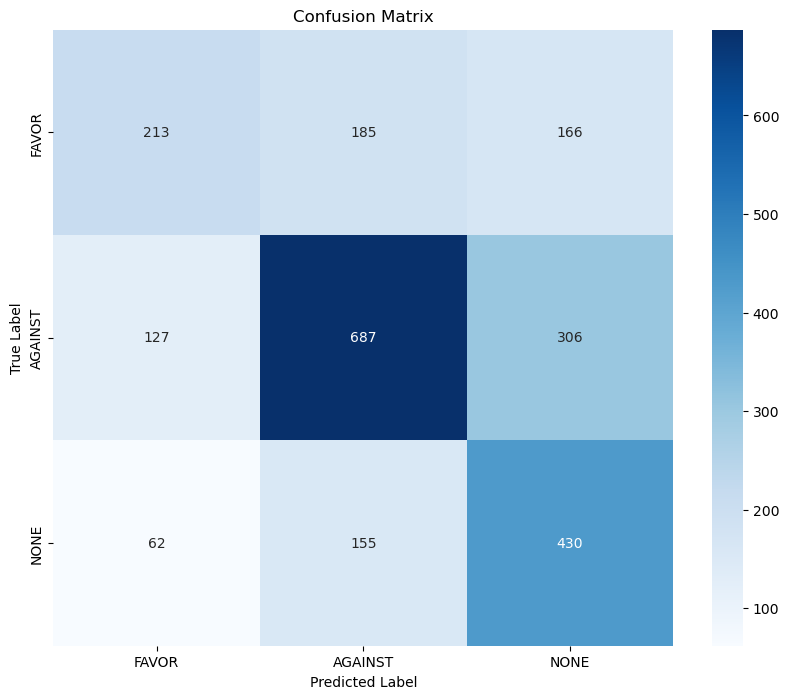

In [130]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### BERTWEET

In [131]:
bertweet_clf = StanceClassifier.load_model('stance_model/vinai/bertweet-base')

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [132]:
y_preds = pd.DataFrame(bertweet_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5785

Per-class F1 Scores:
FAVOR: 0.4764
AGAINST: 0.6325
NONE: 0.5739

Per-target F1 Scores:
Class Atheism: 0.6111
Class Climate Change is a Real Concern: 0.5712
Class Donald Trump: 0.3462
Class Feminist Movement: 0.5820
Class Hillary Clinton: 0.6945
Class Joe Biden: 0.3396
Class Legalization of Abortion: 0.6167

Detailed Classification Report:

FAVOR:
  Precision: 0.5835
  Recall: 0.4025
  F1-score: 0.4764
  Support: 564.0

AGAINST:
  Precision: 0.6755
  Recall: 0.5946
  F1-score: 0.6325
  Support: 1120.0

NONE:
  Precision: 0.4812
  Recall: 0.7110
  F1-score: 0.5739
  Support: 647.0

macro avg:
  Precision: 0.5801
  Recall: 0.5694
  F1-score: 0.5609
  Support: 2331.0

weighted avg:
  Precision: 0.5993
  Recall: 0.5804
  F1-score: 0.5785
  Support: 2331.0


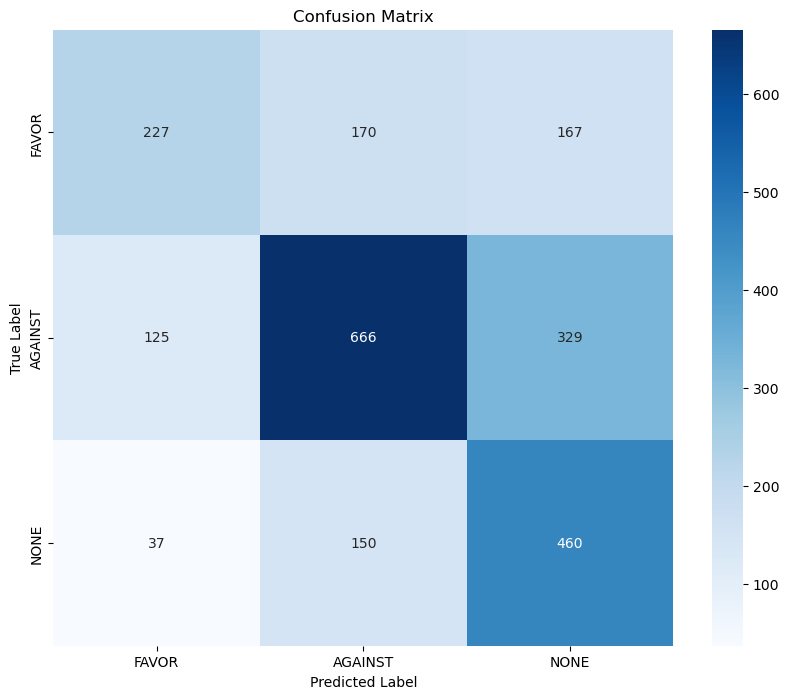

In [133]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### BERT

In [134]:
bert_clf = StanceClassifier.load_model('stance_model/bert-base-uncased')

In [135]:
y_preds = pd.DataFrame(bert_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5474

Per-class F1 Scores:
FAVOR: 0.4459
AGAINST: 0.6020
NONE: 0.5414

Per-target F1 Scores:
Class Atheism: 0.6204
Class Climate Change is a Real Concern: 0.5770
Class Donald Trump: 0.2812
Class Feminist Movement: 0.5403
Class Hillary Clinton: 0.6374
Class Joe Biden: 0.2988
Class Legalization of Abortion: 0.5525

Detailed Classification Report:

FAVOR:
  Precision: 0.5637
  Recall: 0.3688
  F1-score: 0.4459
  Support: 564.0

AGAINST:
  Precision: 0.6841
  Recall: 0.5375
  F1-score: 0.6020
  Support: 1120.0

NONE:
  Precision: 0.4325
  Recall: 0.7233
  F1-score: 0.5414
  Support: 647.0

macro avg:
  Precision: 0.5601
  Recall: 0.5432
  F1-score: 0.5297
  Support: 2331.0

weighted avg:
  Precision: 0.5851
  Recall: 0.5483
  F1-score: 0.5474
  Support: 2331.0


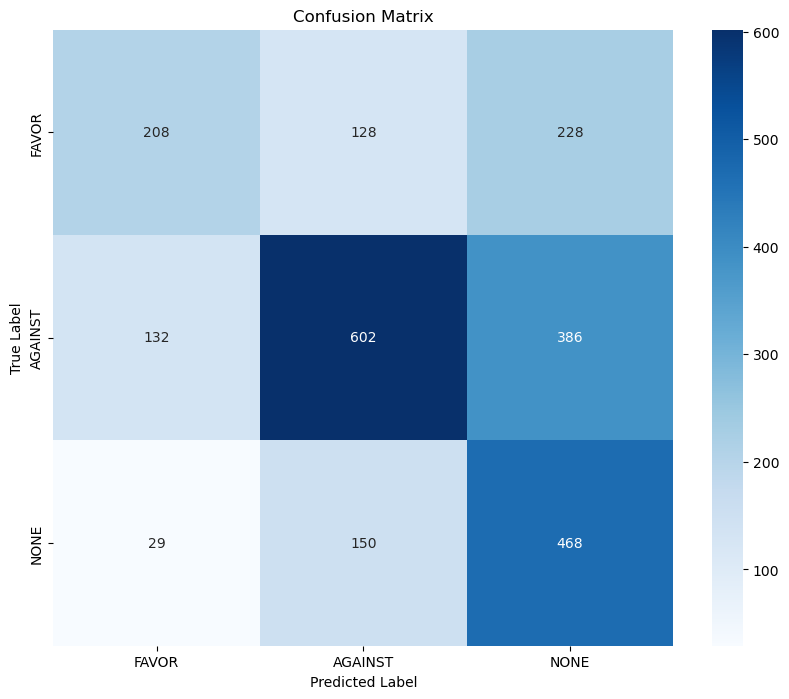

In [136]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### DISTILBERT

In [137]:
distilbert_clf = StanceClassifier.load_model('stance_model/distilbert-base-cased')

In [138]:
y_preds = pd.DataFrame(distilbert_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5459

Per-class F1 Scores:
FAVOR: 0.4320
AGAINST: 0.6190
NONE: 0.5184

Per-target F1 Scores:
Class Atheism: 0.5388
Class Climate Change is a Real Concern: 0.5057
Class Donald Trump: 0.3425
Class Feminist Movement: 0.5542
Class Hillary Clinton: 0.5935
Class Joe Biden: 0.3287
Class Legalization of Abortion: 0.5660

Detailed Classification Report:

FAVOR:
  Precision: 0.4954
  Recall: 0.3830
  F1-score: 0.4320
  Support: 564.0

AGAINST:
  Precision: 0.6487
  Recall: 0.5920
  F1-score: 0.6190
  Support: 1120.0

NONE:
  Precision: 0.4513
  Recall: 0.6090
  F1-score: 0.5184
  Support: 647.0

macro avg:
  Precision: 0.5318
  Recall: 0.5280
  F1-score: 0.5232
  Support: 2331.0

weighted avg:
  Precision: 0.5568
  Recall: 0.5461
  F1-score: 0.5459
  Support: 2331.0


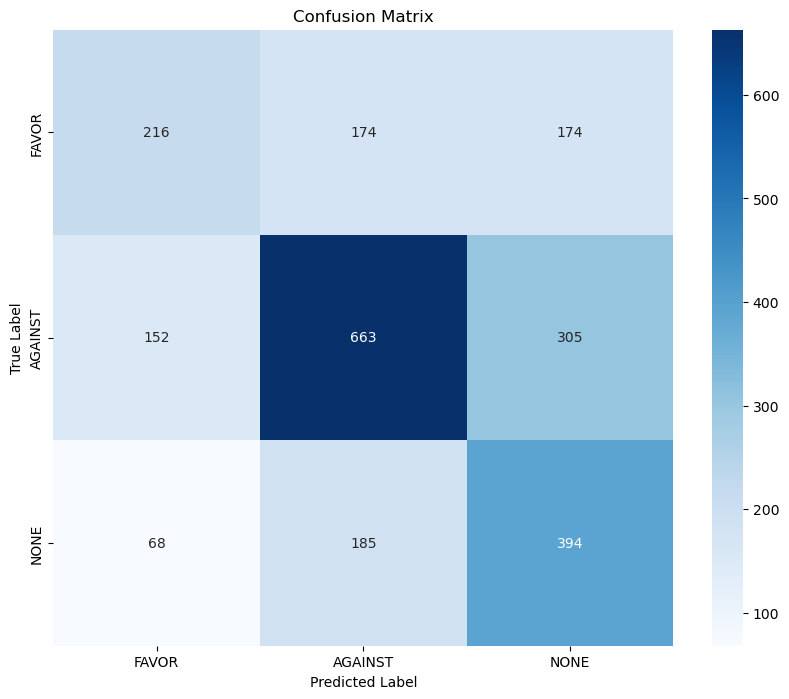

In [139]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

## Custom classifier

### BERTWEET

In [140]:
bertweet_clf = CustomStanceClassifier.load_model('models/vinai/bertweet-base.pt', device="mps")

/Users/nguyennguyen/Documents/rmit/Deep Learning/Assignment02/tweet-stance-classification/models/custom_stance_classifier.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

In [141]:
bertweet_processed_test_inputs = bertweet_clf.tokenizer(processed_test_inputs,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

In [142]:
# Move tensors to device
input_ids = bertweet_processed_test_inputs['input_ids']
attention_mask = bertweet_processed_test_inputs['attention_mask']
        
# Get prediction
with torch.no_grad():
    outputs = bertweet_clf(input_ids, attention_mask)

In [143]:
y_preds = torch.argmax(outputs, dim=1).cpu().numpy()

=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5361

Per-class F1 Scores:
FAVOR: 0.4588
AGAINST: 0.6037
NONE: 0.4865

Per-target F1 Scores:
Class Atheism: 0.6779
Class Climate Change is a Real Concern: 0.5011
Class Donald Trump: 0.4070
Class Feminist Movement: 0.5123
Class Hillary Clinton: 0.5181
Class Joe Biden: 0.2982
Class Legalization of Abortion: 0.5611

Detailed Classification Report:

FAVOR:
  Precision: 0.4861
  Recall: 0.4344
  F1-score: 0.4588
  Support: 564.0

AGAINST:
  Precision: 0.5886
  Recall: 0.6196
  F1-score: 0.6037
  Support: 1120.0

NONE:
  Precision: 0.4861
  Recall: 0.4869
  F1-score: 0.4865
  Support: 647.0

macro avg:
  Precision: 0.5203
  Recall: 0.5136
  F1-score: 0.5163
  Support: 2331.0

weighted avg:
  Precision: 0.5354
  Recall: 0.5380
  F1-score: 0.5361
  Support: 2331.0


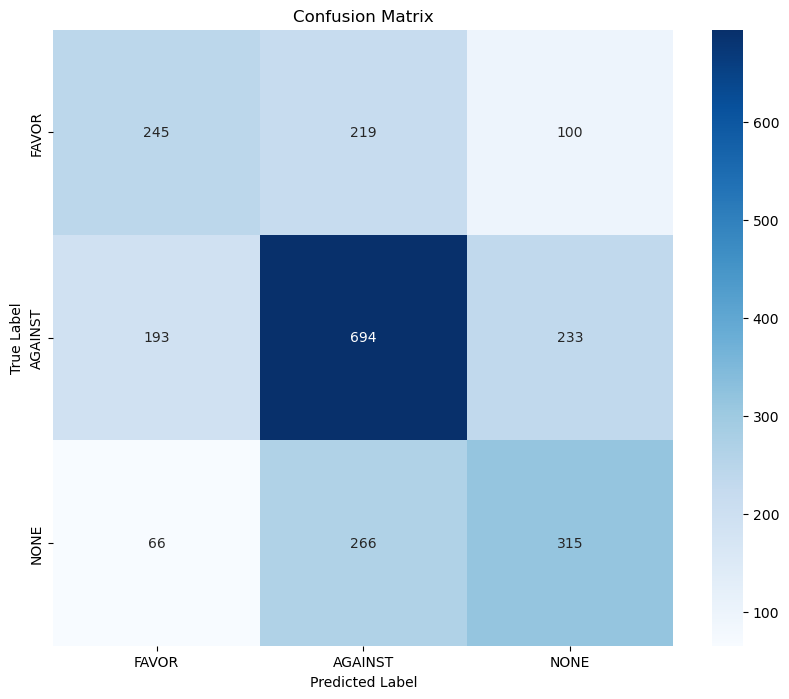

In [144]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### DISTILBERT

In [145]:
distilbert_clf = CustomStanceClassifier.load_model('models/distilbert/distilbert-base-uncased.pt', device="mps")

/Users/nguyennguyen/Documents/rmit/Deep Learning/Assignment02/tweet-stance-classification/models/custom_stance_classifier.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

In [146]:
distilbert_processed_test_inputs = distilbert_clf.tokenizer(processed_test_inputs,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

In [147]:
# Move tensors to device
input_ids = distilbert_processed_test_inputs['input_ids']
attention_mask = distilbert_processed_test_inputs['attention_mask']
        
# Get prediction
with torch.no_grad():
    outputs = distilbert_clf(input_ids, attention_mask)

In [148]:
y_preds = torch.argmax(outputs, dim=1).cpu().numpy()

=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5275

Per-class F1 Scores:
FAVOR: 0.4223
AGAINST: 0.5943
NONE: 0.5034

Per-target F1 Scores:
Class Atheism: 0.6211
Class Climate Change is a Real Concern: 0.4874
Class Donald Trump: 0.2968
Class Feminist Movement: 0.4948
Class Hillary Clinton: 0.4720
Class Joe Biden: 0.2962
Class Legalization of Abortion: 0.5564

Detailed Classification Report:

FAVOR:
  Precision: 0.5339
  Recall: 0.3493
  F1-score: 0.4223
  Support: 564.0

AGAINST:
  Precision: 0.6300
  Recall: 0.5625
  F1-score: 0.5943
  Support: 1120.0

NONE:
  Precision: 0.4210
  Recall: 0.6260
  F1-score: 0.5034
  Support: 647.0

macro avg:
  Precision: 0.5283
  Recall: 0.5126
  F1-score: 0.5067
  Support: 2331.0

weighted avg:
  Precision: 0.5487
  Recall: 0.5285
  F1-score: 0.5275
  Support: 2331.0


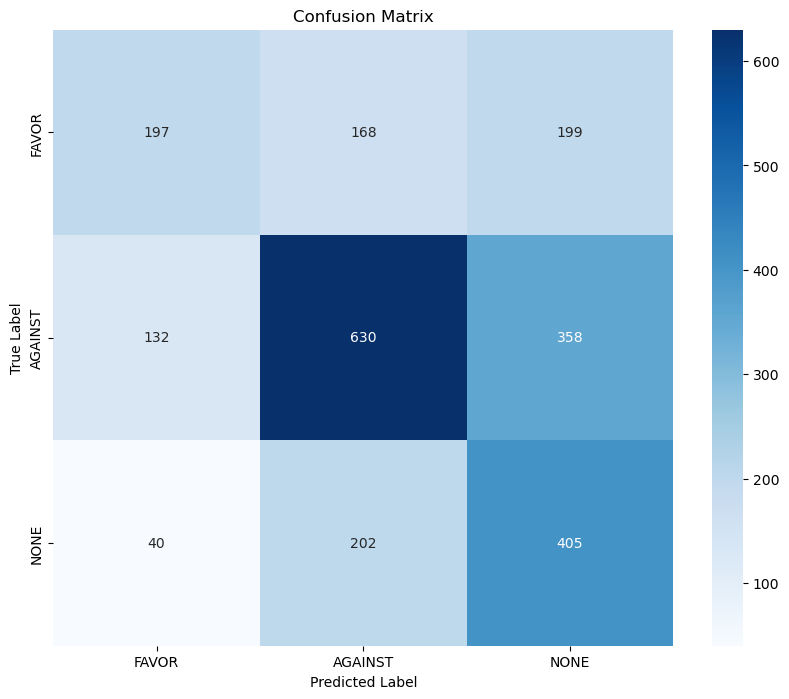

In [149]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])